# Logistic Regresion + NeuralNet

## 1. Logistic Regression

- Mo hình này thuờng đuợc sử dụng khi dữ liệu có the phan chia theo mot duong thang (tuyen tinh)

## Generate dữ liệu 

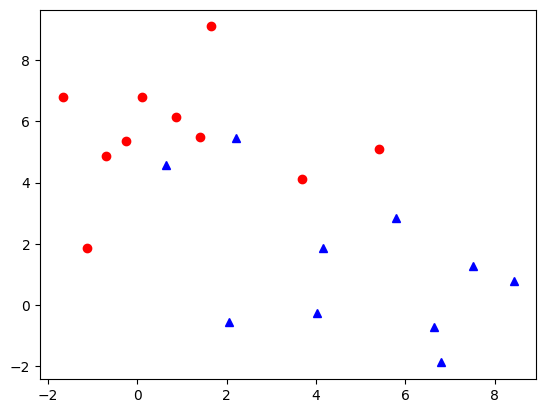

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 10
"""sai số: 2.0 --> Càng lớn thì các điểm càng gần nhau,các điểm ngẫu nhiênphân bố chuẩn - 2: 2 chiều --> X có 2 thành phần"""
#giá trị là các phân phối chuẩn có nhiễu giá trị trung bình là 0, dao động 2
# dao động 2 không có nghĩa là cận trên, cận dưới -2 mà khoảng dao động thôi
# nên vẫn có giá trị > 2, < -2
X_red = np.random.normal(0.0, 2.0, size=(n_samples, 2)) + np.array([1, 5]) # xoay xung quanh điểm [1, 5]
X_blue = np.random.normal(0.0, 2.0, size=(n_samples, 2)) + np.array([5, 1]) # xoay xung quanh điểm [5, 1]
plt.plot(X_red[:, 0], X_red[:, 1], 'ro', label='red')
plt.plot(X_blue[:, 0], X_blue[:, 1], 'b^', label='blue')


In [122]:
# Dữ liệu train sẽ bao gồm cả 2 tập xanh và đó
X = np.concatenate((X_red, X_blue)) # ghép theo hàng, đại diện thêm bộ dữ liệu mới
y = [0]*n_samples + [1]*n_samples # 0 là đỏ, 1 là xanh
# vì y là nhãn nên dùng list là được và cấu trúc + này là theo cộng thêm vào list
# chứ không phải cộng giá trị vào như np


In [123]:
print(X)
print(X.shape)


[[ 3.68028822  4.10525189]
 [ 1.64605242  9.10487219]
 [ 0.86234941  6.14201554]
 [ 0.11277122  6.78813805]
 [ 5.40642106  5.0995924 ]
 [-1.11326082  1.8598718 ]
 [-0.25744654  5.3559755 ]
 [-0.70485445  4.88295451]
 [ 1.4021651   5.47982831]
 [-1.66930322  6.79274569]
 [ 5.79644047  2.84990922]
 [ 4.02569148 -0.26794787]
 [ 2.20727975  5.462167  ]
 [ 4.15328556  1.86811144]
 [ 8.42381315  0.80065367]
 [ 0.63595381  4.58923978]
 [ 2.04602829 -0.55189085]
 [ 6.79708402 -1.87854714]
 [ 7.50541159  1.25921324]
 [ 6.63447247 -0.72437679]]
(20, 2)


In [124]:
y # mảu đỏ - nhãn 0, màu xành - nhãn 1


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Build model

In [125]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)
# nghĩa là khớp X: (nsample, 2) => từng dòng có 2 cột và y (nsample) => từng dòng so khớp giống như trải ra thành cột

LogisticRegression()

# Trực quan hóa với kết quả thư viện sklearn

In [126]:
logistic.coef_ # hệ số hồi quy logistic [x1, x2] --> 2 chiều [chiều ngang, chiều dọc]


array([[ 0.3583491 , -0.61567744]])

In [127]:
logistic.intercept_ # bias


array([1.30539005])

Khi nhìn vô hệ số có biêế đung hay ko ==> trưng quan hóa mô hình ==> Vẽ dth tạo bởi 2 đuờng thẳng

phương trình đường thẳng:
w1 x1 + w2 x2 + bias = 0

x2 = (-w1 x1 -bias) / w2


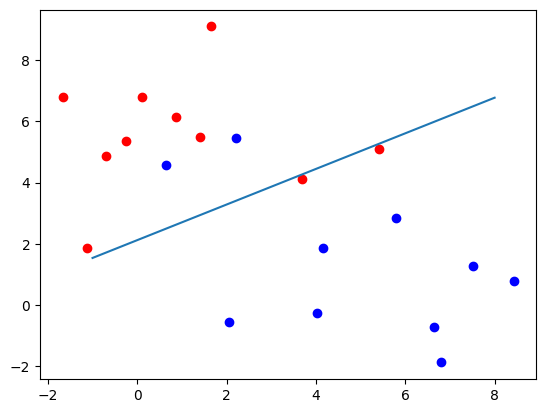

In [128]:
# B1: Vẽ lại các điểm huấn luyện
plt.plot(X_red[:, 0], X_red[:, 1], 'ro', label='red')
plt.plot(X_blue[:, 0], X_blue[:, 1], 'bo', label='blue')

# B2: Vẽ hàm mô hình- PT đường thẳng: w1 x1 + w2 x2 + bias = 0 ==> x2 phụ thuộc x1
w1 = logistic.coef_[0][0] # thành phần x1
w2 = logistic.coef_[0][1] # thành phần x2
bias = logistic.intercept_[0] 

def cal_x2(x1): # hàm thành phần tính y từ các tham số đã train 
    return (-w1*x1 - bias) / w2 

# vẽ 2 điểm là -1 và -8
plt.plot([-1, 8], [cal_x2(-1), cal_x2(8)])


# Đánh giá mô hình

In [129]:
y_pred = logistic.predict(X)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy) 


Accuracy: 0.8


In [130]:
# Cách tính độ chính xác khác ko dùng hàm (ko dùng for)
sum(y_pred == y) / len(y)


np.float64(0.8)

# Truờng hợp dữ liệu phi tuyến

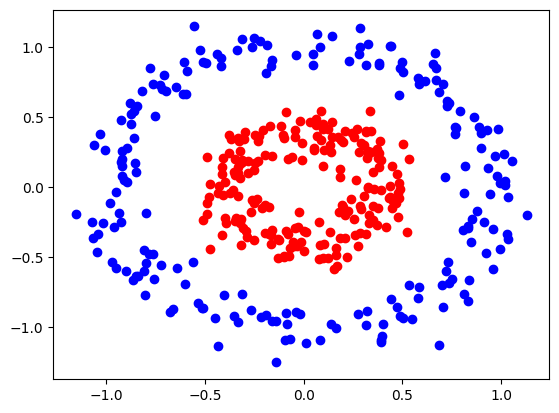

In [131]:
from sklearn.datasets import make_circles

# X, y = make_circles(n_samples=400, factor=.3, noise=.05)
X, y = make_circles(n_samples=400, factor=.4, noise=.1)
#factor tỉ lệ bán kính vòng tròn bên trong so với vòng bên ngoài
#vòng nhỏ bằng 30% vòng ngoài

# visualize the data
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')


In [132]:
print(X.shape)
y.shape

(400, 2)


(400,)

# Build model

In [133]:
logistic = LogisticRegression()
logistic.fit(X, y)


LogisticRegression()

# Trưc quan hóa dữ liệu phi tuyến


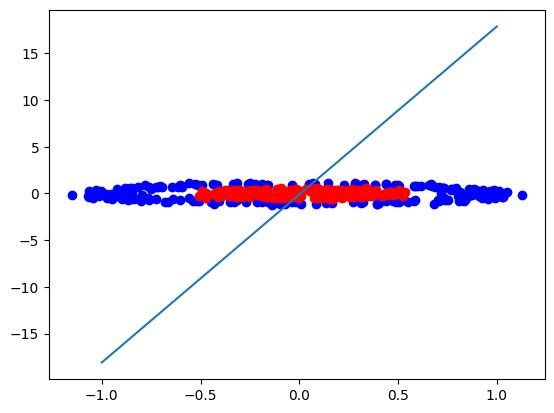

In [134]:
# visualize data
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')

# vẽ hàm mô hình
w1 = logistic.coef_[0][0]
w2 = logistic.coef_[0][1]
bias = logistic.intercept_[0]

def cal_x2(x1):
    return (-w1 * x1 - bias) / w2

plt.plot([-1, 1], [cal_x2(-1), cal_x2(1)])


# Tính accuracy

In [135]:
from sklearn.metrics import accuracy_score
y_pred = logistic.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))


Accuracy: 0.515


# Quay lại Bước `feature engineering`

- tạo thêm đặc trưng mới
  - x1 ==> x1^2
  - x2 ==> x2^2
  -    ==> x1 * x2

In [136]:
X_new = np.hstack((X, (X[:, 0]**2).reshape(X.shape[0], 1))) # X: cũ, X[:, 0]: X1 cũ
X_new = np.hstack((X_new, (X[:, 1]**2).reshape(X.shape[0], 1))) # X: cũ, X[:, 1]: X2 cũ
X_new = np.hstack((X_new, (X[:, 0] * X[:, 1]).reshape(X.shape[0], 1))) # X[:, 0] * X[:, 1] ==> X1 * X2

X_new.shape 
# 5 feature: X1, X2, X1^2, X2^2, X1 * X2
# cách feature engineering này hiệu quả tuy nhiên
# trong thực tế ta lại không biết hình dạng hàm, hoặc không tính được
#vậy thì sẽ không biết có bao nhiêu đặc trưng mà thêm được
# ta phải có tri thực và đặc tính của dataset

#khi ta thêm vào đặc trưng mới sau đó fit thì vẫn là tuyến tính nhưng khi đưa về không gian 2D xét thì nó lại trở thành phi tuyến


(400, 5)

# build model

In [137]:
logistic = LogisticRegression()
logistic.fit(X_new, y) # X mới có 5 feature


LogisticRegression()

In [138]:
y_pred = logistic.predict(X_new)
print("Accuracy: ",accuracy_score(y, y_pred))


Accuracy:  0.9975


==> Nêu ko đủ tri thức để thay dạng mô hình đẻ thêm feaure engineering ==> Dung Neural Network cho dữ liệu phi tuyến

❓Tóm lại: pipeline tư duy của đoạn code là gì?

Dữ liệu không tuyến tính

Dùng PolynomialFeatures để mở rộng không gian

Logistic Regression học siêu phẳng trong không gian mới

Chiếu ngược về không gian gốc → đường cong

Dùng meshgrid + contour để vẽ ranh giới

(300, 300)
(300, 300)
(90000, 2)
(90000, 5)
(90000,)


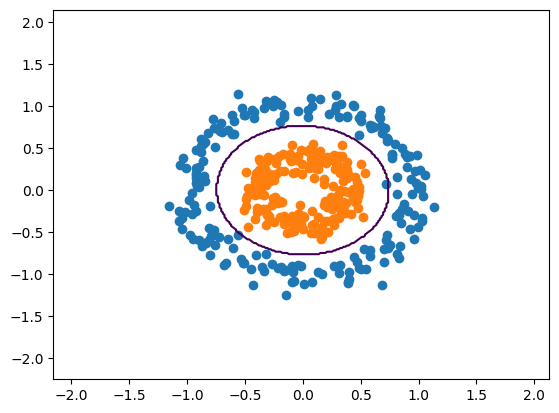

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

poly = PolynomialFeatures(degree=2, include_bias=False) # degree là bậc tối đa : bậc 2 => hình tròn
X_poly = poly.fit_transform(X) # tạo feature tự động, biến đổi bậc 1 thành bậc 2
# 2 feature thành 5 feature

model = LogisticRegression() 
model.fit(X_poly, y) # học được 5 w và 1 b

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
) # tạo lưới điểm 2D là mặt phẳng sẽ xét, chia 300 để mịn hơn
# vẽ dư +1, -1 để thấy rõ ranh giới
print(xx.shape) # 300, 300
print(yy.shape)
# ravel ra thì là (300*300,)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.transform(grid)

print(grid.shape) # nối 9000, lại với nhau, có 2 featue
print(grid_poly.shape) # biến đổi 2 feature thành 5 feature chứ không train lại

Z = model.predict(grid_poly) # dự đoán y = Z, các bias, w không quan tâm nữa
print(Z.shape)
Z = Z.reshape(xx.shape)

# levels bằng 0.5 nghĩa là 2 lớp ranh giới 0.5 chia 2 lớp 
plt.contour(xx, yy, Z, levels=[0.5]) # vẽ đường nối các điểm có cùng giá trị
#Z(x, y) = 0.5 đường có giá trị là 0.5 giữa các lớp nên nó sẽ lấy value giữa của 2 lớp này
plt.scatter(X[y==0,0], X[y==0,1]) # y== nghĩa là cho mảng y đi qua đk xét nếu đúng thì true tại phần tử đó
#đúng là số dòng của X phải bằng số phần tử của y
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# y = ground truth (nhãn thật, do con người / dữ liệu gán)
# Z = output của model tại mỗi điểm (x, y) trên mặt phẳng


❓meshgrid biến 2 vector 1D thành cái gì?
Giả sử: nghĩa là tạo thành các điểm trong mặt phẳng, lấy tất cả tổ hợp

x = [1, 2, 3]
y = [10, 20]

với x có kích thước n1, y có n2 thì 

sau meshgrip xx là (n1*n2, n1*n2)
Sau meshgrid(x, y):

xx = [[1 2 3]
      [1 2 3]]

yy = [[10 10 10]
      [20 20 20]]

TRAIN:
X + y  ──> model học w, b

INFERENCE:
X_new ──> model ──> Z (dự đoán)

VISUALIZE:
X, y   ──> vẽ điểm thật
model ──> vẽ ranh giới


# Sử dụng mạng Neural Network cho dữ liêu phi tuyến

In [140]:
from sklearn.neural_network import MLPClassifier # multi-layer perceptron classifier

params = {
    'hidden_layer_sizes': [10], # 1 lớp ảnh - 10 nơ-ron
    'activation': 'logistic', # hàm kích hoạt là logistic regression
    'solver': 'adam', # thuật toán tối ưu hóa
    'alpha': 0.00, # tham số điều chỉnh độ phức tạp của mô hình
    'batch_size':100,
    'random_state': 0,
    'tol':0.0001, # sai số tối đa cho việc dừng thuật toán
    'nesterovs_momentum': False, # có sử dụng nesterov momentum hay không
    'learning_rate': 'constant', # tốc độ học không thay đổi
    'learning_rate_init': 0.01, # tốc độ học ban đầu
    'max_iter': 100000, # số lần lặp tối đa
    'shuffle': True, # có trộn dữ liệu hay không
    'n_iter_no_change': 50, # số lần lặp không thay đổi
    'verbose': False # có in ra thông tin hay không
}

net = MLPClassifier(**params) # khởi tạo mạng nơ-ron với các tham số đã định nghĩa ở trên


In [141]:
# Sau khi khai báo ==> fit trên data cũ vì X_new đã có đặc trưng đã engineered
# Dùng raw data ==> Chưa có tri thức gì về mô hình để feature engineering
net.fit(X, y)


MLPClassifier(activation='logistic', alpha=0.0, batch_size=100,
              hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=100000,
              n_iter_no_change=50, nesterovs_momentum=False, random_state=0)

# Đánh giá neural network

In [142]:
net.score(X, y)


1.0

In [ ]:
net.intercepts_ # bias của các nơ-ron trong lớp đầu tiên

# 10 no-ron ==> 10 bias cho hidden layer
# 1 no-ron ==> 1 bias cho output layer

# net.intercepts_[0] : bias của hidden layer
# net.intercepts_[1] : bias của output layer

[array([ 2.02624811, -4.34612494, -5.44597254, -4.83680305, -4.88279313,
         5.56376277, -3.66248632,  5.45671147, -0.28628598, -4.36364183]),
 array([-1.54016326])]

In [ ]:
# net.coefs_ # trọng số của các nơ-ron trong lớp đầu tiên

# # net.coefs_[0] : trọng số từ Input → Hidden
# # net.coefs_[1] : trọng số từ Hidden → Output
# z_j = w1j·x1 + w2j·x2 + b_j

[array([[-0.01265958, -2.91913672,  9.73300296,  4.90839225,  3.91088543,
          5.28863694, -3.86961732, 10.1636066 , -0.73247472, -5.36373592],
        [ 0.34269678, -6.70454564,  0.51740669,  7.56880767, -7.33610969,
         -9.22980501, -4.98117191, -1.40491021,  1.46876095, -5.19027903]]),
 array([[-1.91588137],
        [-2.39639998],
        [-7.32525894],
        [-6.06467489],
        [-7.98294813],
        [ 5.48281638],
        [-2.87188327],
        [ 5.76906733],
        [-1.22996966],
        [-3.41817673]])]

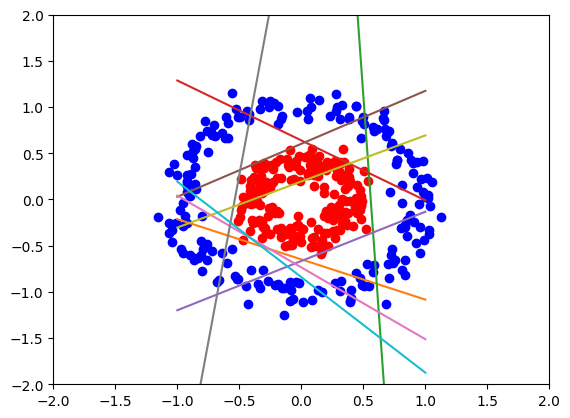

In [ ]:
# visualize các node trong mang Neural Network sau khi đã học từ dữ liệu
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bo', label='blue')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro', label='red')

# Layer muốn visualize là hidden layer
layer = 0

for nodeID in range(len(net.intercepts_[0])):
    w1 = net.coefs_[layer][0][nodeID] # trọng số của nơ-ron thứ nodeID trong lớp đầu tiên
    w2 = net.coefs_[layer][1][nodeID] # trọng số của nơ-ron thứ nodeID trong lớp đầu tiên
    b = net.intercepts_[layer][nodeID] # bias của nơ-ron thứ nodeID trong lớp đầu tiên
    
    plt.plot([-1, 1], [-w1/w2*(-1)-b/w2, -w1/w2*(1)-b/w2]) 
    # 1 noron --> 1 đường thẳng logistic regression --> 1 weak classifier
    # vì weak ==> Phối hợp nhiều noron --> nhiều đường thẳng ==> strong classifier
